# Imports

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Loading CSVs

In [3]:
players = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Football_Players_Stats_2024_2025/player_eval.csv')

In [4]:
players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A-PK,xG+xAG,Rk_stats_shooting,Nation_stats_shooting,Pos_stats_shooting,Comp_stats_shooting,Age_stats_shooting,Born_stats_shooting,90s_stats_shooting,Gls_stats_shooting,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Rk_stats_passing,Nation_stats_passing,Pos_stats_passing,Comp_stats_passing,Age_stats_passing,Born_stats_passing,90s_stats_passing,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,01-Mar,PPA,CrsPA,PrgP_stats_passing,Rk_stats_passing_types,Nation_stats_passing_types,Pos_stats_passing_types,Comp_stats_passing_types,Age_stats_passing_types,Born_stats_passing_types,90s_stats_passing_types,Att_stats_passing_types,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Off,Blocks,Rk_stats_gca,Nation_stats_gca,Pos_stats_gca,Comp_stats_gca,Age_stats_gca,Born_stats_gca,90s_stats_gca,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Rk_stats_defense,Nation_stats_defense,Pos_stats_defense,Comp_stats_defense,Age_stats_defense,Born_stats_defense,90s_stats_defense,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,Rk_stats_possession,Nation_stats_possession,Pos_stats_possession,Comp_stats_possession,Age_stats_possession,Born_stats_possession,90s_stats_possession,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,Rk_stats_playing_time,Nation_stats_playing_time,Pos_stats_playing_time,Comp_stats_playing_time,Age_stats_playing_time,Born_stats_playing_time,MP_stats_playing_time,Min_stats_playing_time,Mn/MP,Min%,90s_stats_playing_time,Starts_stats_playing_time,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,Rk_stats_misc,Nation_stats_misc,Pos_stats_misc,Comp_stats_misc,Age_stats_misc,Born_stats_misc,90s_stats_misc,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,Rk_stats_keeper,Nation_stats_keeper,Pos_stats_keeper,Comp_stats_keeper,Age_stats_keeper,Born_stats_keeper,MP_stats_keeper,Starts_stats_keeper,Min_stats_keeper,90s_stats_keeper,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,Rk_stats_keeper_adv,Nation_stats_keeper_adv,Pos_stats_keeper_adv,Comp_stats_keeper_adv,Age_stats_keeper_adv,Born_stats_keeper_adv,90s_stats_keeper_adv,GA_stats_keeper_adv,PKA_stats_keeper_adv,FK_stats_keeper_adv,CK_stats_keeper_adv,OG_stats_keeper_adv,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Market Value,Market Value Euros
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.0,0.00,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,63,51,12,2,0,0,2,10,0,0,0,0,50,0,1,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,2,2.09,2,0,0,0,0,0,0,0.0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,1,eng ENG,DF,eng Premier League,25-051,2000,3,86,29,3.7,1.0,1,61.0,0,2,13.0,11,0.67,2,0,2,2.09,1.61,2.3,0.3,2.0,2.12,1,eng ENG,DF,eng Premier League,25-051,2000,1.0,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,

In [5]:
players.shape

(2004, 269)

# Dropping Columns & Imputing Nulls

In [6]:
print("\n".join(players.columns))

Rk
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Gls
Ast
G+A
G-PK
PK
PKatt
CrdY
CrdR
xG
npxG
xAG
npxG+xAG
PrgC
PrgP
PrgR
G+A-PK
xG+xAG
Rk_stats_shooting
Nation_stats_shooting
Pos_stats_shooting
Comp_stats_shooting
Age_stats_shooting
Born_stats_shooting
90s_stats_shooting
Gls_stats_shooting
Sh
SoT
SoT%
Sh/90
SoT/90
G/Sh
G/SoT
Dist
FK
PK_stats_shooting
PKatt_stats_shooting
xG_stats_shooting
npxG_stats_shooting
npxG/Sh
G-xG
np:G-xG
Rk_stats_passing
Nation_stats_passing
Pos_stats_passing
Comp_stats_passing
Age_stats_passing
Born_stats_passing
90s_stats_passing
Cmp
Att
Cmp%
TotDist
PrgDist
Ast_stats_passing
xAG_stats_passing
xA
A-xAG
KP
01-Mar
PPA
CrsPA
PrgP_stats_passing
Rk_stats_passing_types
Nation_stats_passing_types
Pos_stats_passing_types
Comp_stats_passing_types
Age_stats_passing_types
Born_stats_passing_types
90s_stats_passing_types
Att_stats_passing_types
Live
Dead
FK_stats_passing_types
TB
Sw
Crs
TI
CK
In
Out
Str
Cmp_stats_passing_types
Off
Blocks
Rk_stats_gca
Nation_sta

In [7]:
players.isnull().sum()

Rk                               0
Player                           0
Nation                           0
Pos                              0
Squad                            0
Comp                             0
Age                              0
Born                             0
MP                               0
Starts                           0
Min                              0
90s                              0
Gls                              0
Ast                              0
G+A                              0
G-PK                             0
PK                               0
PKatt                            0
CrdY                             0
CrdR                             0
xG                               0
npxG                             0
xAG                              0
npxG+xAG                         0
PrgC                             0
PrgP                             0
PrgR                             0
G+A-PK                           0
xG+xAG              

### Dropping First Batch of Columns

In [8]:
# Define columns to drop
columns_to_drop = ['SoT%', 'G/Sh', 'Dist', 'npxG/Sh', 'Mn/Start', 'Mn/Sub']

# Drop unwanted columns
players = players.drop(columns=columns_to_drop, errors='ignore')

### Filling Nulls with Median Values of Player in Same Position

In [9]:
# Fill 'On-Off' with mean of the players in similiar positions
players['On-Off'] = players.groupby('Pos')['On-Off'].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Fill null values in the 'G/SoT' column with the median value of players in similar positions
players['G/SoT'] = players.groupby('Pos', group_keys=False)['G/SoT'].apply(lambda group: group.fillna(group.median()))

In [11]:
# Define the columns to fill based on position group median
columns_to_fill = ['Tkl%', 'Succ%', 'Tkld%', 'Won%', 'Save%', 'CS%', 'PSxG/SoT', 'Cmp%']

# Fill the nulls for each column using the median of players in the same position
for column in columns_to_fill:
    players[column] = players.groupby('Pos')[column].transform(lambda group: group.fillna(group.median()))

/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lukewalker/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanme

# Filling Nulls with Zero in GK Stats for Outfield Players

In [12]:
# Define the columns to process
columns_to_process = [
    'Rk_stats_keeper', 'Nation_stats_keeper', 'Pos_stats_keeper',
    'Comp_stats_keeper', 'Age_stats_keeper', 'Born_stats_keeper',
    'MP_stats_keeper', 'Starts_stats_keeper', 'Min_stats_keeper',
    '90s_stats_keeper', 'GA', 'GA90', 'SoTA', 'Saves', 'Save%',
    'W', 'D', 'L', 'CS', 'CS%', 'PKatt_stats_keeper', 'PKA', 'PKsv',
    'PKm', 'Rk_stats_keeper_adv', 'Nation_stats_keeper_adv',
    'Pos_stats_keeper_adv', 'Comp_stats_keeper_adv',
    'Age_stats_keeper_adv', 'Born_stats_keeper_adv',
    '90s_stats_keeper_adv', 'GA_stats_keeper_adv', 'PKA_stats_keeper_adv',
    'FK_stats_keeper_adv', 'CK_stats_keeper_adv', 'OG_stats_keeper_adv',
    'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp_stats_keeper_adv',
    'Att_stats_keeper_adv', 'Cmp%_stats_keeper_adv', 'Att (GK)', 'Thr',
    'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist'
]

# Set nulls to 0 for non-goalkeepers, leave nulls for goalkeepers
players.loc[players['Pos'] != 'GK', columns_to_process] = players.loc[players['Pos'] != 'GK', columns_to_process].fillna(0)

In [13]:
players.isnull().sum()

Rk                            0
Player                        0
Nation                        0
Pos                           0
Squad                         0
Comp                          0
Age                           0
Born                          0
MP                            0
Starts                        0
Min                           0
90s                           0
Gls                           0
Ast                           0
G+A                           0
G-PK                          0
PK                            0
PKatt                         0
CrdY                          0
CrdR                          0
xG                            0
npxG                          0
xAG                           0
npxG+xAG                      0
PrgC                          0
PrgP                          0
PrgR                          0
G+A-PK                        0
xG+xAG                        0
Rk_stats_shooting             0
Nation_stats_shooting         0
Pos_stat

# Standardising Player Names

In [14]:
import pandas as pd
from unidecode import unidecode

# Function to standardize player names and remove dashes
def standardize_names(df, name_column):
    df[name_column] = df[name_column].apply(
        lambda x: unidecode(str(x)).strip().lower().replace('-', '') if pd.notnull(x) else x
    )
    return df

# Apply standardization to both DataFrames ('player_name' column)
players = standardize_names(players, 'Player')

# Check the names after standardization (optional)
print(players['Player'].head())

0          max aarons
1          max aarons
2      rodrigo abajas
3      james abankwah
4    yunis abdelhamid
Name: Player, dtype: object


# Dropping Currency Signs & Symbols in *Market Value*

In [15]:
def rep(s):
    s = s.replace('€', '')
    if 'm' in s:
        s = float(s.replace('m', '')) * 1000
    elif 'k' in s:
        s = float(s.replace('k', ''))
    return s

players['Market Value'].apply(rep)

0       16000.0
1       16000.0
2         100.0
3         800.0
4         500.0
         ...   
1999    42000.0
2000     1800.0
2001     3000.0
2002      600.0
2003    22000.0
Name: Market Value, Length: 2004, dtype: float64

In [16]:
# Remove symbols like '€', 'm', 'k' and convert to numerical values
players['Market Value'] = players['Market Value'].apply(rep)

# Ensure the target variable is numerical
print(players['Market Value'].head())

0    16000.0
1    16000.0
2      100.0
3      800.0
4      500.0
Name: Market Value, dtype: float64


In [17]:
# Export the players DataFrame to a CSV file
players.to_csv('players.csv', index=False)

print("DataFrame exported successfully to 'players.csv'")

DataFrame exported successfully to 'players.csv'


# Correlation Matrix & Analysis

### Correlation Matrix Overview of All Columns

/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_6295/1617506563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players.corr()


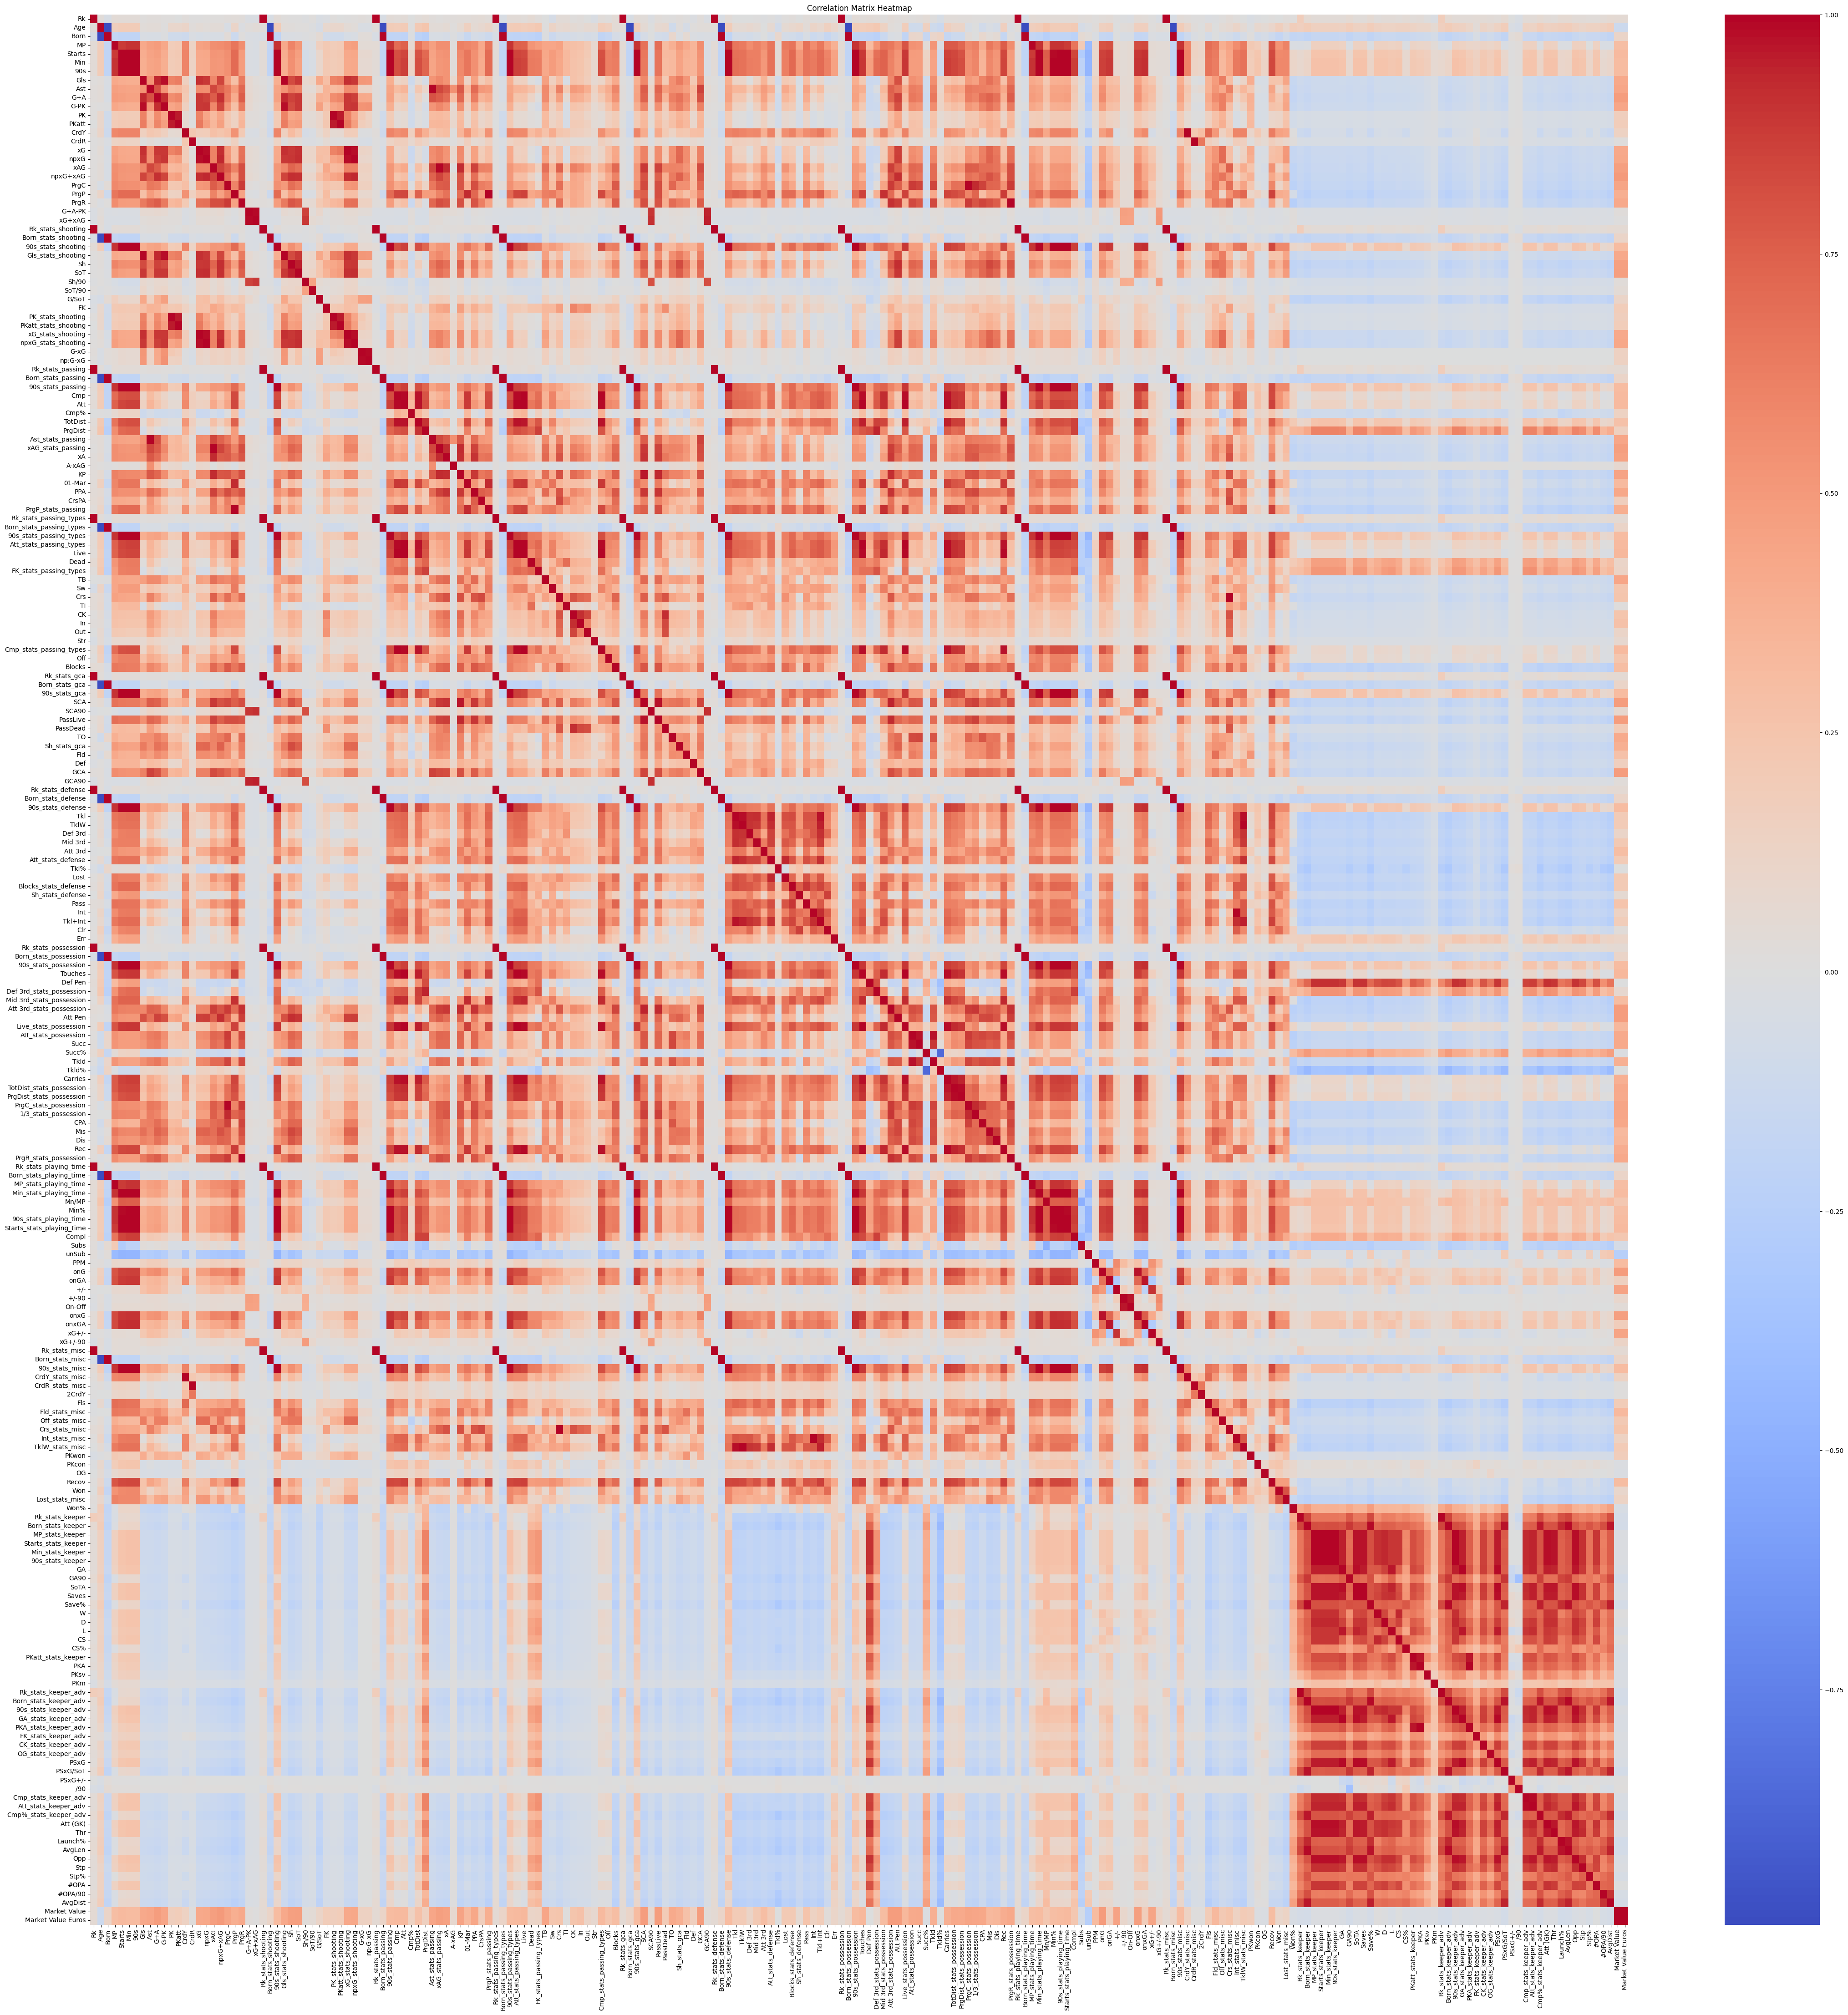

In [18]:
# Compute correlation matrix
correlation_matrix = players.corr()

# Dynamically adjust figure size based on number of columns
num_columns = correlation_matrix.shape[1]  # Get number of columns
fig_width = num_columns / 4  # Adjust width factor (experiment as needed)
fig_height = num_columns / 4  # Adjust height factor

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", xticklabels=True, yticklabels=True)

# Add title
plt.title("Correlation Matrix Heatmap")
plt.show()

### Listing *Market Value* & *Market Value Euros* as Target Columns

In [19]:
# List of target columns
target_columns = ['Market Value', 'Market Value Euros']

# Compute the pairwise correlation matrix
correlation_matrix = players.corr()

# Extract only the correlations of all columns with the target columns
target_correlations = correlation_matrix[target_columns]

/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_6295/707057133.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players.corr()


### Setting Threshold for Columns Below 0.30 [Leaving 0.4 to 0.5 Values Highlighted]

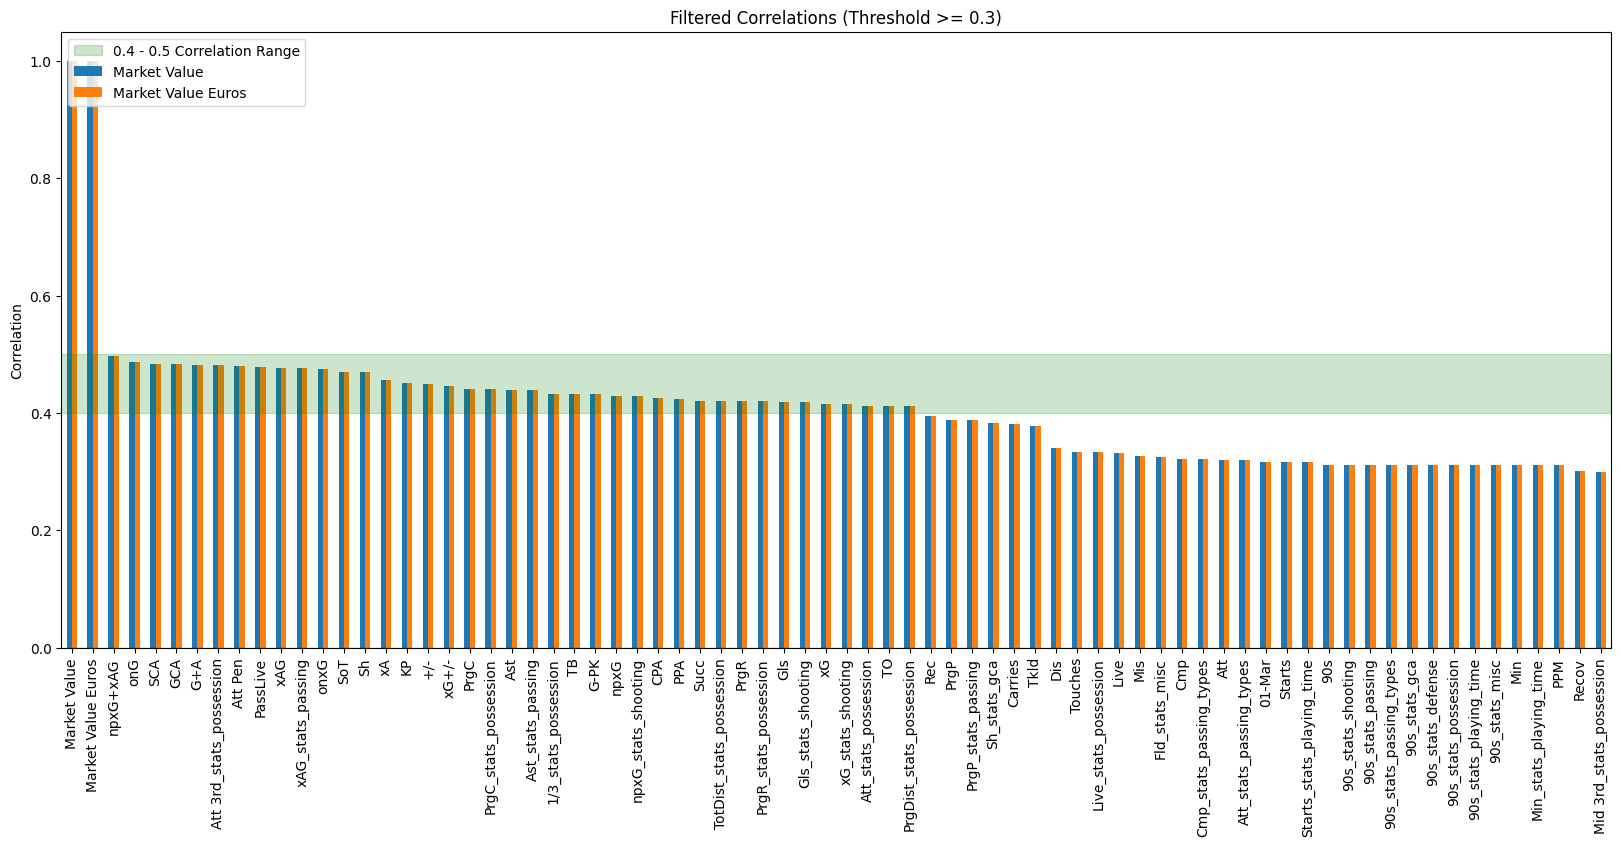

In [20]:
# Threshold for excluding low correlations
threshold = 0.3

# Only keep columns where absolute correlation >= threshold for either target column
filtered_correlations = target_correlations.loc[
    (target_correlations['Market Value'].abs() >= threshold) | 
    (target_correlations['Market Value Euros'].abs() >= threshold)
]

# Sort the remaining correlations by absolute value for better readability
sorted_correlations = filtered_correlations.abs().sort_values(by=['Market Value', 'Market Value Euros'], ascending=False)

# Plot a bar chart for filtered and sorted correlations
ax = sorted_correlations.plot(kind='bar', figsize=(20, 8), title=f"Filtered Correlations (Threshold >= {threshold})")

# Highlight the range of interest (0.4 to 0.5)
plt.axhspan(0.4, 0.5, color='green', alpha=0.2, label="0.4 - 0.5 Correlation Range")  # Highlight range 0.4-0.5

# Set chart labels and formatting
plt.ylabel("Correlation")
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at correlation = 0
plt.legend(loc="upper left") 

In [21]:
# Define the range for correlation values
lower_bound = 0.4
upper_bound = 0.5

# Filter features based on their correlation with "Market Value" or "Market Value Euros"
features_in_range = target_correlations[
    ((target_correlations['Market Value'] >= lower_bound) & (target_correlations['Market Value'] <= upper_bound)) |
    ((target_correlations['Market Value Euros'] >= lower_bound) & (target_correlations['Market Value Euros'] <= upper_bound))
]

# Extract the feature names
features_list = features_in_range.index.tolist()

# Output the list of features
print("Features with correlation between 0.4 and 0.5:", features_list)

Features with correlation between 0.4 and 0.5: ['Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgR', 'Gls_stats_shooting', 'Sh', 'SoT', 'xG_stats_shooting', 'npxG_stats_shooting', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'KP', 'PPA', 'TB', 'SCA', 'PassLive', 'TO', 'GCA', 'Att 3rd_stats_possession', 'Att Pen', 'Att_stats_possession', 'Succ', 'TotDist_stats_possession', 'PrgDist_stats_possession', 'PrgC_stats_possession', '1/3_stats_possession', 'CPA', 'PrgR_stats_possession', 'onG', '+/-', 'onxG', 'xG+/-']


# Building The Model (Random Forest/GridSearchCV)

In [22]:
# Define the features (X) and target (y)
selected_features = ['Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgR', 'Gls_stats_shooting', 
                     'Sh', 'SoT', 'xG_stats_shooting', 'npxG_stats_shooting', 'Ast_stats_passing', 'xAG_stats_passing',
                     'xA', 'KP', 'PPA', 'TB', 'SCA', 'PassLive', 'TO', 'GCA', 'Att 3rd_stats_possession',
                     'Att Pen', 'Att_stats_possession', 'Succ', 'TotDist_stats_possession', 'PrgDist_stats_possession',
                     'PrgC_stats_possession', '1/3_stats_possession', 'CPA', 'PrgR_stats_possession', 'onG', '+/-', 
                     'onxG', 'xG+/-']

X = players[selected_features]
y = players['Market Value']

In [23]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (1603, 39)
Test Set Shape: (401, 39)


In [24]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Define the hyperparameter grid (parameters to tune)
param_grid = {
    'n_estimators': [140, 160, 180, 200, 250],   # Test more estimators for stability
    'max_depth': [11, 14, 16, None],             # Allow deeper trees or unrestricted depth
    'min_samples_split': [7, 10, 15, 20],        # Stricter split criteria
    'min_samples_leaf': [3, 4, 5, 6],            # Slightly higher minimum leaf sizes
    'max_features': ['sqrt']                     # Keep only 'sqrt' since it's the most stable
}

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,    # Model
    param_grid=param_grid,      # Hyperparameter grid
    scoring='neg_mean_squared_error',  # Evaluation metric (negated since GridSearch minimizes by default)
    cv=5,                       # Number of folds in cross-validation
    verbose=2,                  # Show progress while tuning
    n_jobs=-1                   # Parallel processing to speed up computation
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Extract and print the best parameters and score
print("Best Parameters:", grid_search.best_params_)  # Optimal hyperparameter values
print("Best Score (Negative MSE):", grid_search.best_score_)  # Best cross-validated score

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   0.9s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.9s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   1.3s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimator

[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.9s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   1.3s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=160; total time=   0.7s
[CV] END max_depth=11, max_features=sq

[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.9s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   1.3s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=140; total time=   0.6s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sq

[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   1.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.9s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   1.3s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   1.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=160; total time=   0.8s
[CV] END max_depth=11, max_features=sqr

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=140; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=140; total time=   0.6s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=160; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=160; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=160; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=140; total time=   0.6s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=140; total time=   0.6s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=160; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_featu

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   1.3s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=140; total time=   0.6s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=160; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=180; total time=   0.8s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=14, max_featu

Best Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 250}
Best Score (Negative MSE): -190146717.72739083


In [26]:
# Train the Random Forest with Best Parameters
best_random_forest = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Retrain the best model
best_random_forest.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MAE: {mae_best_rf:.2f}")
print(f"Optimized Random Forest R²: {r2_best_rf:.2f}")

Optimized Random Forest MAE: 8330.29
Optimized Random Forest R²: 0.32


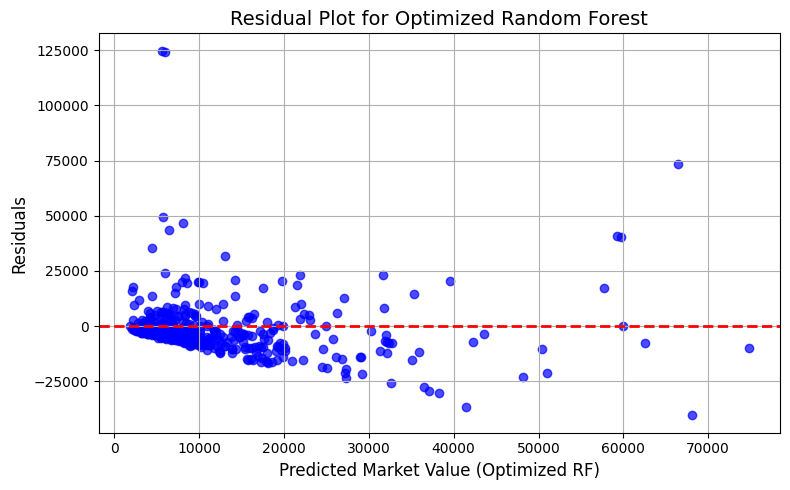

In [27]:
# Predict on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculate residuals for the optimized Random Forest
residuals_rf_best = y_test - y_pred_best_rf

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_best_rf, residuals_rf_best, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Market Value (Optimized RF)", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot for Optimized Random Forest", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

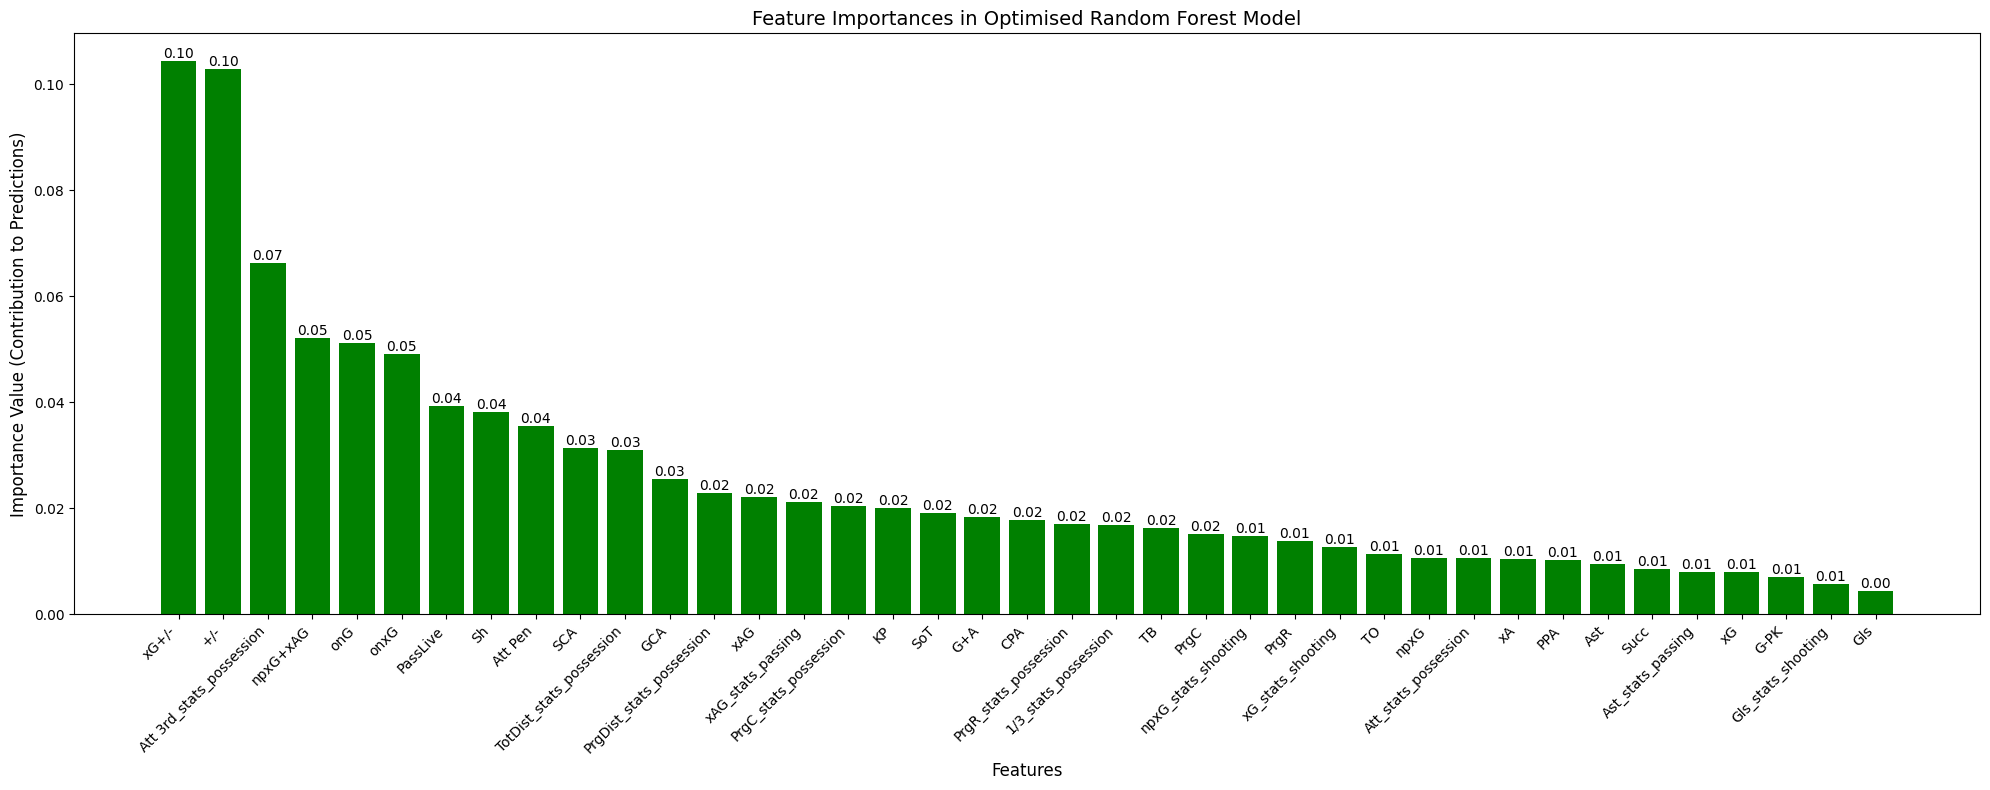

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=140; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=140; total time=   0.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=160; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=180; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   1.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   1.2s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   1.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=140; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=160; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=180; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=180; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   1.2s
[CV] END max_depth=16, max_featu

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=160; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=180; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=140; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=160; total time=   0.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=180; total time=   0.9s
[CV] END max_depth=16, max_features

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250; total time=   1.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=160; total time=   0.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=160; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=180; total time=   1.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=250; total time=   1.2s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=140; total time=   0.6s
[CV] END max_depth=16, max_featur

In [28]:
# Feature names and their importances from the optimized Random Forest
features = selected_features # Replace this with the list of features used in your model
importances = best_random_forest.feature_importances_  # Extract feature importances from optimized RF

# Sort feature importances for better display
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Create a bar chart for feature importances
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], 
               color=['green' if imp > 0 else 'red' for imp in feature_importances['Importance']])

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Chart formatting
plt.title('Feature Importances in Optimised Random Forest Model', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Value (Contribution to Predictions)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for better readability
plt.tight_layout()
plt.show()